# Exercise 2
Author: Tobias Famos
For the course Machine Learning and Data Mining

## Import statements

In [1]:
import pandas
import matplotlib.pyplot as plot
from sklearn.naive_bayes import  GaussianNB
from sklearn import preprocessing
from mlxtend.evaluate import accuracy_score
from sklearn.model_selection import train_test_split
import os


## Task 1: Titanic
## Preprocessing
Fist lets load the Data

In [2]:
titanic = pandas.read_csv("Data/titanic.csv")
titanic.name = "Titanic"
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Now, we need to create labels from the binary attributes (Sex and Survived)

In [3]:
le = preprocessing.LabelEncoder()
titanic["Sex"] = le.fit_transform(titanic["Sex"])
titanic["Survived"] = le.fit_transform(titanic["Survived"])
titanic["Name"] = le.fit_transform(titanic["Name"])

## Subtask a)
As we can see from the code lines below, the tho most siginificant correlations are Sex and PClass (to have them sorted we aI applied the Absolute values)

In [4]:
def get_correlation(dataframe, attribute_name):
    correlation = dataframe.corr()[attribute_name]
    correlation = correlation.apply(lambda entry: abs(entry))
    return correlation

def print_correlation(dataframe, attribute_name):
    correlation = get_correlation(dataframe, attribute_name)
    try:
        print(f"Correlation of {dataframe.name} on {attribute_name}")
    except:
        print(f"Correlation on {attribute_name}")
    print(correlation.sort_values(ascending=False))
    return correlation

def get_highest_correlated_parameters(dataframe, attribute_name):
    correlation = get_correlation(dataframe, attribute_name)
    correlation.pop(correlation.idxmax())
    best = correlation.idxmax()
    correlation.pop(best)
    sec_best = correlation.idxmax()
    return [best, sec_best]

In [5]:
corr = print_correlation(titanic, "Survived")
highest_correlated_parameters = get_highest_correlated_parameters(titanic, "Survived")


Correlation of Titanic on Survived
Survived                   1.000000
Sex                        0.542152
Pclass                     0.336528
Fare                       0.256179
Name                       0.103486
Parents/Children Aboard    0.080097
Age                        0.059665
Siblings/Spouses Aboard    0.037082
Name: Survived, dtype: float64


## Subtask b)
Define a training and evaluation function based on a 75 / 25 split using naive Bayes.

In [6]:
def split_function_random(attributes, target_values):
    attributes_train, attributes_test, target_value_train, target_value_test = train_test_split(attributes, target_values, test_size=0.25, random_state=12)
    return attributes_train, attributes_test, target_value_train, target_value_test


def predict_and_evaluate_bayes(attributes, target_value, split_function):
    naive_bayes = GaussianNB()

    attributes_train, attributes_test, target_value_train, target_value_test = split_function(attributes, target_value);

    naive_bayes.fit(attributes_train, target_value_train)
    test_predictions = naive_bayes.predict(attributes_test)
    accuracy = accuracy_score(target_value_test, test_predictions)
    print(f'Accuracy: {round(accuracy,4)} for Naive Bayes based on {attributes.keys()}' )
    return accuracy

Select the two highest correlated predictors. and the targe value

In [7]:
titanic_correlated_predictors = titanic[highest_correlated_parameters]
titanic_target_value = titanic["Survived"]

Now lets train and evaluate the model based on Sex and class:

In [8]:
accuracy = predict_and_evaluate_bayes(titanic_correlated_predictors, titanic_target_value, split_function_random)

Accuracy: 0.8243 for Naive Bayes based on Index(['Sex', 'Pclass'], dtype='object')


## Subtask c)
Now lets add all the predictors and compare.

In [9]:
titanic_all_predictors =titanic.loc[:,titanic.columns != 'Survived']
titanic_predictors = [titanic[["Sex"]],
    titanic[["Sex","Pclass"]],
    titanic[["Sex", "Pclass", "Fare"]],
    titanic[["Sex", "Pclass", "Fare","Name"]],
    titanic[["Sex", "Pclass", "Fare","Name", "Parents/Children Aboard"]],
    titanic[["Sex", "Pclass", "Fare","Name", "Parents/Children Aboard","Age"]],
    titanic.loc[:,titanic.columns != 'Survived'],
]

accuracies = []
labels = []
for predictor in titanic_predictors:
    accuracies.append(predict_and_evaluate_bayes(predictor, titanic_target_value, split_function_random))
    labels.append(len(predictor.keys()))



Accuracy: 0.8243 for Naive Bayes based on Index(['Sex'], dtype='object')
Accuracy: 0.8243 for Naive Bayes based on Index(['Sex', 'Pclass'], dtype='object')
Accuracy: 0.7387 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare'], dtype='object')
Accuracy: 0.7883 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare', 'Name'], dtype='object')
Accuracy: 0.8018 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare', 'Name', 'Parents/Children Aboard'], dtype='object')
Accuracy: 0.8063 for Naive Bayes based on Index(['Sex', 'Pclass', 'Fare', 'Name', 'Parents/Children Aboard', 'Age'], dtype='object')
Accuracy: 0.8018 for Naive Bayes based on Index(['Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')


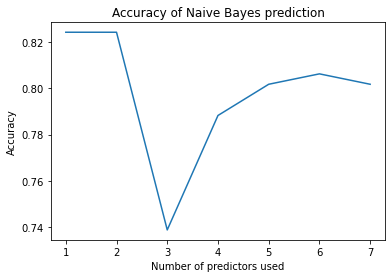

In [10]:
plot.plot(labels, accuracies)
plot.title("Accuracy of Naive Bayes prediction")
plot.xlabel("Number of predictors used")
plot.ylabel("Accuracy")
plot.show()

Now we can interprete these results:
Firstly, there seems to be no improvement by using two predictors Sex and Class instead of only Sex. This is constant over multiple seeds for the train / test split. Secondly, we can see that the accuracy drops and rises again. This is a good sign that we did overfit our data by using all the predictors availabale.
Also, in my opinion, it is extremely useless to use a generated class over the names

# Task 2
## Loading the data

In [11]:
smi = pandas.read_csv("Data/SMI.csv")
smi.name = "SMI"
smi.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-11-09,1378.900024,1389.000000,1375.300049,1387.099976,1387.099976,0
1,1990-11-12,1388.099976,1408.099976,1388.099976,1407.500000,1407.500000,0
2,1990-11-13,1412.199951,1429.400024,1411.400024,1415.199951,1415.199951,0
3,1990-11-14,1413.599976,1413.599976,1402.099976,1410.300049,1410.300049,0
4,1990-11-15,1410.599976,1416.699951,1405.099976,1405.699951,1405.699951,0


From the Dataset Description we can see, that there seem to be a few missing values in the volume column. This must be kept in mind when moving forward.

Adding the daily return as a column in the dataset. We derive it using the closing price.
$r_{t} = \frac{p_{t} - p_{t-1}}{p_{t-1}}$


In [12]:

for index_smi in range(1,len(smi)):
    p_t = smi.loc[index_smi, 'Close']
    p_t_minus_1 = smi.loc[index_smi-1, 'Close']
    daily_return = (p_t - p_t_minus_1)/p_t_minus_1
    smi.loc[index_smi, 'Daily Return'] = daily_return


In [13]:
for index_smi in range(2,len(smi)):
    smi.loc[index_smi, 'Yesterday Daily Return'] = smi.loc[index_smi-1, 'Daily Return']
    smi.loc[index_smi, 'Yesterdays Volume'] = smi.loc[index_smi-1, "Volume"]


Building the ground truth labels

In [14]:
def build_ground_truth(row):
    if row['Daily Return'] > 0:
        return True
    return False

smi['Is Going Up'] = smi.apply (lambda row: build_ground_truth(row), axis=1)

Generating the rolling averages of yesterdays daily return. We use yesterday, so we have all the values needed to predict today's binary decision in one row.

In [15]:

smi["Return Rolling 5"] = smi['Yesterday Daily Return'].rolling(5).mean()
smi["Return Rolling 10"] = smi['Yesterday Daily Return'].rolling(10).mean()
smi["Return Rolling 20"] = smi['Yesterday Daily Return'].rolling(20).mean()
smi["Return Rolling 50"] = smi['Yesterday Daily Return'].rolling(50).mean()
smi["Return Rolling 200"] = smi['Yesterday Daily Return'].rolling(200).mean()

Little Cleanup: replace the NaN with Zeros

In [16]:
smi = smi.fillna(0)

## Subtask a)
Now lets find the best correlated values on the binary daily return decision (Is Going Up). We ignore the Dialy Return, Yesterday Daily Return and the open close etc as they would be direct indicators.

In [17]:
smi_smaller = smi[["Return Rolling 5", "Return Rolling 10", "Return Rolling 20","Return Rolling 50", "Return Rolling 200", "Yesterdays Volume","Is Going Up"]]

correlation_binary_decision = print_correlation(smi_smaller, 'Is Going Up')
highest_correlated_parameters = get_highest_correlated_parameters(smi_smaller, "Is Going Up"),
print(highest_correlated_parameters)

Correlation on Is Going Up
Is Going Up           1.000000
Return Rolling 200    0.032377
Return Rolling 20     0.012092
Return Rolling 50     0.010859
Return Rolling 5      0.008622
Yesterdays Volume     0.008254
Return Rolling 10     0.004978
Name: Is Going Up, dtype: float64
(['Return Rolling 200', 'Return Rolling 20'],)


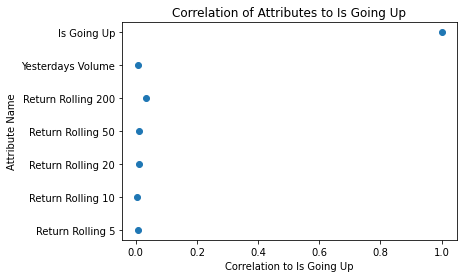

In [18]:
plot.scatter(correlation_binary_decision,correlation_binary_decision.keys())
plot.ylabel("Attribute Name")
plot.xlabel("Correlation to Is Going Up")
plot.title("Correlation of Attributes to Is Going Up")
plot.show()

## Subtask b)
First, lets write our test / train split function, so we have everything to reuse the previous Naive Bayes evaluation function

In [19]:
def split_function_temporal(attributes, target_values):
    offset = 100
    attributes_train = attributes[:-offset]
    attributes_test = attributes[-offset:]
    target_values_train = target_values[:-offset]
    target_values_test = target_values[-offset:]
    return attributes_train, attributes_test, target_values_train, target_values_test


Lets pick the ones with the highest correlation: Volume and Yesterday's daily Return


In [20]:
smi_predictors = smi_smaller[highest_correlated_parameters[0]]
smi_target_value = smi["Is Going Up"]

accuracy = predict_and_evaluate_bayes(smi_predictors, smi_target_value, split_function_temporal)

Accuracy: 0.6 for Naive Bayes based on Index(['Return Rolling 200', 'Return Rolling 20'], dtype='object')


We get an accuracy of 0.60 with our train test split (using the last 100 values to test). Although this is not a very good accuracy, with the correlations we have we can not expect more.

In [21]:
def split_function_temporal_larger(attributes, target_values):
    offset =400
    attributes_train = attributes[:-offset]
    attributes_test = attributes[-offset:]
    target_values_train = target_values[:-offset]
    target_values_test = target_values[-offset:]
    return attributes_train, attributes_test, target_values_train, target_values_test

In [22]:
predict_and_evaluate_bayes(smi_predictors, smi_target_value, split_function_temporal_larger)

Accuracy: 0.5525 for Naive Bayes based on Index(['Return Rolling 200', 'Return Rolling 20'], dtype='object')


0.5525

As we can see from this larger test split, the 0.6 was most likely luck and the true accuracy lies closer to 0.5

## Other Indices
Just for fun, lets see if our naive bayes classifier is as bad for other stock data:

In [23]:
def evaluate_naive_bayes_for(file_name):
    file_type = file_name.split(".")[-1]
    if(file_type == "txt"):
        stock_data = pandas.read_csv(file_name, sep=" ")
    else:
        stock_data = pandas.read_csv(file_name)
    stock_data_name = file_name.split("/")[-1].split(".")[-2]
    stock_data.name = stock_data_name
    stock_data.head(5)


    for index_stock_data in range(1,len(stock_data)):
        p_t = stock_data.loc[index_stock_data, 'Close']
        p_t_minus_1 = stock_data.loc[index_stock_data-1, 'Close']
        daily_return = (p_t - p_t_minus_1)/p_t_minus_1
        stock_data.loc[index_stock_data, 'Daily Return'] = daily_return

    for index_stock_data in range(2,len(stock_data)):
        stock_data.loc[index_stock_data, 'Yesterday Daily Return'] = stock_data.loc[index_stock_data-1, 'Daily Return']
        stock_data.loc[index_stock_data, 'Yesterdays Volume'] = stock_data.loc[index_stock_data-1, "Volume"]

    stock_data['Is Going Up'] = stock_data.apply (lambda row: build_ground_truth(row), axis=1)


    stock_data["Return Rolling 5"] = stock_data['Yesterday Daily Return'].rolling(5).mean()
    stock_data["Return Rolling 10"] = stock_data['Yesterday Daily Return'].rolling(10).mean()
    stock_data["Return Rolling 20"] = stock_data['Yesterday Daily Return'].rolling(20).mean()
    stock_data["Return Rolling 50"] = stock_data['Yesterday Daily Return'].rolling(50).mean()
    stock_data["Return Rolling 200"] = stock_data['Yesterday Daily Return'].rolling(200).mean()

    stock_data = stock_data.fillna(0)

    stock_data_reduced = stock_data[["Return Rolling 5", "Return Rolling 10", "Return Rolling 20","Return Rolling 50", "Return Rolling 200", "Yesterdays Volume","Is Going Up"]]

    highest_correlated_parameters = get_highest_correlated_parameters(stock_data_reduced, "Is Going Up")

    stock_data_prediction = stock_data[highest_correlated_parameters]
    stock_data_target_value = stock_data["Is Going Up"]

    accuracy = predict_and_evaluate_bayes(stock_data_prediction, stock_data_target_value, split_function_temporal)
    return accuracy, stock_data_name

Now lets run this upon all the available stock data.

In [24]:
directory = 'Data/AllStockData'
availabale_files = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        availabale_files.append(f)

In [25]:
names = []
accuracies= []
for file in availabale_files:
    accuracy, stock_name = evaluate_naive_bayes_for(file)
    names.append(stock_name)
    accuracies.append(accuracy)

Accuracy: 0.56 for Naive Bayes based on Index(['Return Rolling 5', 'Return Rolling 10'], dtype='object')
Accuracy: 0.5 for Naive Bayes based on Index(['Yesterdays Volume', 'Return Rolling 10'], dtype='object')
Accuracy: 0.5 for Naive Bayes based on Index(['Yesterdays Volume', 'Return Rolling 5'], dtype='object')
Accuracy: 0.54 for Naive Bayes based on Index(['Return Rolling 5', 'Return Rolling 10'], dtype='object')
Accuracy: 0.49 for Naive Bayes based on Index(['Return Rolling 5', 'Return Rolling 10'], dtype='object')
Accuracy: 0.54 for Naive Bayes based on Index(['Return Rolling 5', 'Return Rolling 10'], dtype='object')
Accuracy: 0.48 for Naive Bayes based on Index(['Return Rolling 10', 'Return Rolling 5'], dtype='object')
Accuracy: 0.64 for Naive Bayes based on Index(['Return Rolling 5', 'Return Rolling 50'], dtype='object')
Accuracy: 0.58 for Naive Bayes based on Index(['Return Rolling 10', 'Return Rolling 50'], dtype='object')
Accuracy: 0.62 for Naive Bayes based on Index(['Yesterd

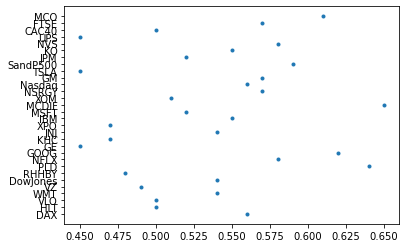

In [26]:
plt = plot.plot(accuracies, names, linestyle='None', marker='.')
plot.show()